# Bilateral Bargaining: Evaluation of the Experiments

In [1]:
import os
import sys
import json
import numpy as np
import torch
import matplotlib.pyplot as plt

# pylint: disable=wrong-import-position
sys.path.append(os.path.realpath('.'))
sys.path.append(os.path.join(os.path.expanduser('~'), 'bnelearn'))

from scripts.utils import *

In [24]:
### EXP-1 BB 1/2-DA & VCG -----------------------------------------------------
path_kDA = '/home/kohring/bnelearn/experiments/debug/exp-1_experiment/double_auction/single_item/k_price/0.5/uniform/symmetric/risk_1.0/1b1s/2021-09-21 Tue 15.20/aggregate_log.csv'
path_VCG = '/home/kohring/bnelearn/experiments/debug/exp-1_experiment/double_auction/single_item/vcg/uniform/symmetric/risk_1.0/1b1s/2021-09-21 Tue 18.02/aggregate_log.csv'
exps = dict()
exps['$0.5$-DA'] = path_kDA
exps['VCG'] = path_VCG

csv_to_tex(
    experiments = exps,
    name = os.curdir + '/exp-1_table.tex',
    metrics = ['eval_vs_bne/L_2', 'eval_vs_bne/epsilon_relative', 'eval/estimated_relative_ex_ante_util_loss'],
    caption = 'Mean and standard deviation over ten runs of 1{,}000 iterations of the learning metrics for the two most common mechanisms in the bilateral bargaining setup.',
    symmetric = False,
    label = 'tab:exp-1_table'
)

In [25]:
### EXP-2 risk experiments ----------------------------------------------------
path = '/home/kohring/bnelearn/experiments/debug/exp-2_experiment'
path += '/double_auction/single_item/k_price/0.5/uniform/symmetric'
exps = dict()
for risk_str in sorted(next(os.walk(path))[1]):
    exps[float(risk_str[5:])] = get_sub_path(path + '/' + risk_str, 2) + '/aggregate_log.csv'

csv_to_tex(
    experiments = exps,
    name = os.curdir + '/exp-2_table.tex',
    metrics = ['eval_vs_bne/L_2', 'eval_vs_bne/epsilon_relative', 'eval/estimated_relative_ex_ante_util_loss'],
    symmetric = False,
    caption = 'Mean and standard deviation of experiments over ten runs' \
        + ' each for differnt risk attitutes of the buyer and seller.',
    label = 'tab:exp-2_table'
)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


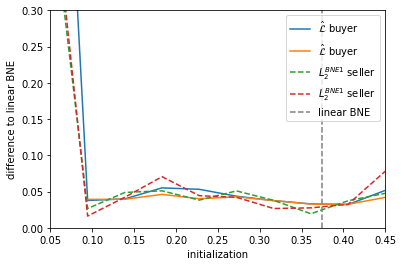

In [51]:
### EXP-3 custom pretraining experiments --------------------------------------
path = '/home/kohring/bnelearn/experiments/debug/exp-3_experiment-v2/double_auction/single_item/k_price/0.5/uniform/symmetric/risk_1.0/1b1s/'
metrics_names = ['eval/estimated_relative_ex_ante_util_loss', 'eval_vs_bne/L_2']
exp_names = sorted(os.listdir(path))
metrics = np.zeros((2, len(metrics_names), len(exp_names)))

g_05s = np.zeros(len(exp_names))
for i, exp_name in enumerate(exp_names):
    with open(path + exp_name + '/experiment_configurations.json') as json_file:
        g_05s[i] = float(json.load(json_file)['setting']['pretrain_transform'])
    df = single_exp_logs_to_df(path=path + exp_name + '/aggregate_log.csv',
                               with_stddev=False, metrics=metrics_names)
    # buyer
    metrics[0, 0, i] = float(df['$\hat{\mathcal{L}}$'][0])
    metrics[0, 1, i] = float(df['$L_2^\text{BNE{1}}$'][0])
    # seller
    metrics[1, 0, i] = float(df['$\hat{\mathcal{L}}$'][1])
    metrics[1, 1, i] = float(df['$L_2^\text{BNE{1}}$'][1])

metrics[metrics != metrics] = np.inf

plt.figure()
plt.plot(g_05s, metrics[0, 0], label=r'$\hat{\mathcal{L}}$ buyer')
plt.plot(g_05s, metrics[1, 0], label=r'$\hat{\mathcal{L}}$ buyer')
plt.plot(g_05s, metrics[0, 1], '--', label=r"$L_2^{\mathit{BNE{1}}}$ seller")
plt.plot(g_05s, metrics[1, 1], '--', label=r"$L_2^{\mathit{BNE{1}}}$ seller")
plt.plot([3./8., 3./8.], [0, 1], '--', color='grey', label=r'linear BNE')
plt.xlabel('initialization'); plt.ylabel('difference to linear BNE')
plt.xlim([g_05s[0], g_05s[-1]]); plt.ylim([0, .3])
plt.legend(loc='upper right')
plt.savefig(os.curdir + '/tab:exp-2_table.eps')
plt.show()